**补偿 FIR 滤波器引入的延迟**

对信号进行滤波会引入延迟。这意味着相对于输入，输出信号在时间上有所偏移。此示例向您说明如何抵消这种影响。

有限脉冲响应滤波器经常将所有频率分量延迟相同的时间量。这样，我们就很容易通过对信号进行时移处理来针对延迟进行校正。

以 500 Hz 的频率对心电图读数采样，采样时间为 1 秒。添加随机噪声。重置随机数生成器以获得可再现性。

In [2]:
import numpy as np 
from scipy import signal 
from scipy.io import loadmat 
import matplotlib.pyplot as plt  

Fs = 500 
N = 500 
np.random.seed(0)  

x = loadmat('ecg_signal.mat') 
xn = x['x'].flatten()+0.25*np.random.randn(N) 
tn = np.arange(N)/Fs

使用滤波器阻挡 75 Hz 以上的频率，以消除一部分噪声。使用**designfilt**设计一个阶数为 70 的滤波器。

In [3]:
nfilt = 70 
Fst = 75  

d = signal.firwin(nfilt+1,Fst,fs=Fs)

对信号进行滤波并绘图。与原始信号相比，结果更平滑，但存在滞后。

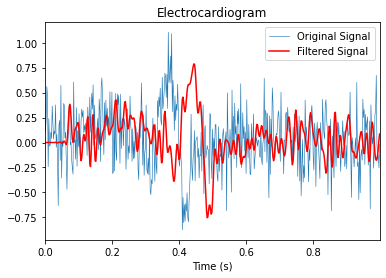

In [4]:
zi = signal.lfilter_zi(d,1)*0 
xf,_ = signal.lfilter(d,1,xn,zi=zi)  

fig,ax = plt.subplots() 
ax.plot(tn,xn,label='Original Signal',linewidth=0.6) 
ax.plot(tn,xf,color='red',label='Filtered Signal') 
ax.set_title('Electrocardiogram') 
ax.set_xlabel('Time (s)');ax.legend() 
ax.autoscale(tight=True,axis='x')
fig.savefig("program1.png",dpi=500)

使用**grpdelay**检查滤波器造成的延迟是否等于滤波器阶数的一半。

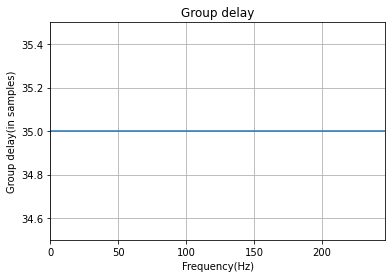

In [5]:
w,gd = signal.group_delay((d,1),w=nfilt,fs=Fs)
fig,ax = plt.subplots()
ax.plot(w,gd);ax.grid()
ax.set_title('Group delay')
ax.set_ylabel('Group delay(in samples)')
ax.set_xlabel('Frequency(Hz)')
ax.autoscale(tight=True,axis='x')
delay = np.mean(gd)
ax.set_ylim(34.5,35.5)
fig.savefig("program2.png",dpi=500)

对滤波后的信号进行时移以对齐数据。删除信号的前**delay**个样本。删除原始采样点和时间向量的最后**delay**个采样点，再次对信号绘图，并验证它们是否对齐：

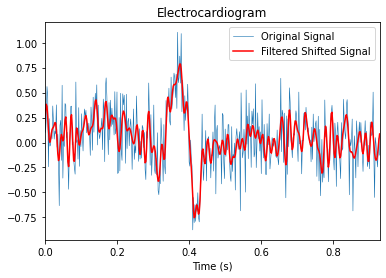

In [6]:
tt = tn[:len(tn)-int(delay)] 
sn = xn[:len(xn)-int(delay)]  

sf = xf[int(delay):]  

fig,ax = plt.subplots() 
ax.plot(tt,sn,label='Original Signal',linewidth=0.6) 
ax.plot(tt,sf,color='red',label='Filtered Shifted Signal') 
ax.set_title('Electrocardiogram')  
ax.set_xlabel('Time (s)');ax.legend()  
ax.autoscale(tight=True,axis='x')
fig.savefig("program3.png",dpi=500)